Observed = 30, exact p-value (right-tailed) = 0.162
Normal approx (cc): z = 0.986, p-value ≈ 0.162


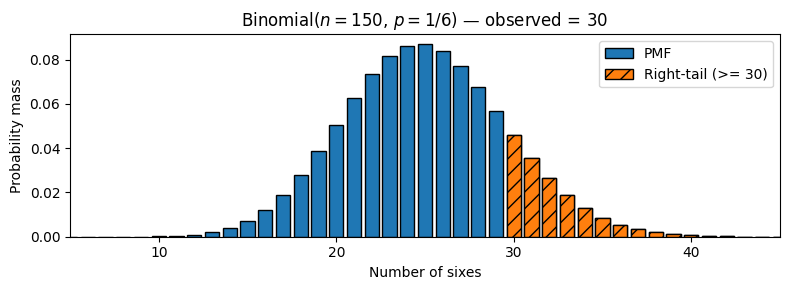

In [1]:

# Exact binomial p-value and plot for Alex's loaded die
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# Parameters
n = 150
p = 1/6
observed = 30

# Exact p-value (right-tailed): P(X >= observed)
p_value_exact = 1 - binom.cdf(observed - 1, n, p)
print(f'Observed = {observed}, exact p-value (right-tailed) = {p_value_exact:.3f}')

# Normal approximation with continuity correction
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
z_cc = (observed - 0.5 - mu) / sigma           # continuity correction
p_value_approx = norm.sf(z_cc)                # one-sided tail
print(f'Normal approx (cc): z = {z_cc:.3f}, p-value ≈ {p_value_approx:.3f}')

# Prepare PMF values for plotting
x = np.arange(0, 46)           # show 0..45 for clarity
pmf = binom.pmf(x, n, p)

# Plot
fig, ax = plt.subplots(figsize=(8, 3))   # wider, not too tall
ax.bar(x, pmf, edgecolor='black', label='PMF')
# highlight right-tail region (>= observed)
ax.bar(x[x >= observed], pmf[x >= observed], edgecolor='black', hatch='//', label=f'Right-tail (>= {observed})')

ax.set_xlim(5, 45)
ax.set_xticks([10, 20, 30, 40])
ax.set_xlabel('Number of sixes')
ax.set_ylabel('Probability mass')
ax.set_title("Binomial($n=150$, $p=1/6$) — observed = 30")
ax.legend()
plt.tight_layout()

# Save figure
fig.savefig('img/number_of_sixes.png', dpi=200)
plt.show()

